# 제3 고지 : 고차 미분 계산
## STEP 27 : 테일러 급수 미분 


DeZero를 사용하여 구체적인 문제를 풀어볼텐데, 이번 단계의 목표는 $\sin$ 함수의 미분이다.  
물론 $y=\sin(x)$ 함수의 미분은 해석적으로 $y'=\cos(x)$ 인 것을 알고 있지만, 테일러 급수를 이용해 계산해보도록 한다.


### 27.1 sin 함수 구현

넘파이가 제공하는 `np.sin` 과 `np.cos`을 활용하여 구현하여 $x=\frac{\pi}{4}$ 에서 미분 값을 구해본다.



In [3]:
import sys

sys.path.append("..")

import numpy as np
from dezero import Function,Variable

class Sin(Function):
    def forward(self,x):
        y= np.sin(x)
        return y 
    
    def backward(self,gy):
        x = self.inputs[0].data 
        gx = gy * np.cos(x)
        return gx 
    
def sin(x):
    return Sin()(x)


x = Variable(np.array(np.pi/4))
y = sin(x)
y.backward()
print(f"f(x) : {y.data}, df/dx : {x.grad} ")

f(x) : 0.7071067811865475, df/dx : 0.7071067811865476 


### 27.2 테일러 급수 이론 
이제는 테일러 급수를 이용하여 미분을 계산해보려한다.  
테일러 급수란, **어떤 함수를 다항식으로 근사하는 방법** 으로 다음과 같이 정의된다.

Def.  
$a$ 를 포함하는 구간에서 $f$가 **무한번 미분 가능**할 때, **$x=a$ 에서 $f$의 테일러 급수**(Taylor series generated by $f$ at $x=0$) 는 다음과 같다.
$$
\sum_{k=0}^\infty \frac{f^{(k)}(a)}{k!}(x-a)^k = f(a) + f'(a)(x-a) + \frac{f''(a)}{2!}(x-a)^2+\dots+\frac{f^{(n)}(a)}{n!}(x-a)^n+\dots
$$
특히, **$x=0$ 에서 $f$의 테일러 급수** 인 **$f$ 의 매크로린 급수**(Maclaurin series generated by $f$)는 다음과 같다.
$$
\sum_{k=0}^\infty \frac{f^{(k)}(0)}{k!}x^k = f(0) + f'(0)x + \frac{f''(0)}{2!}x^2+\dots+\frac{f^{(n)}(0)}{n!}x^n+\dots
$$

 이를 바탕으로, $\sin(x)$의 매크로린 급수를 구하면 다음과 같다. 

$$
\begin{aligned}
f(x) &= \sin(x) \\
f'(x) &= \cos(x) \\ 
f''(x) &= -\sin(x) \\ 
f^{(3)}(x) &= -\cos(x) \\ 
f^{(4)}(x) &= \sin(x) \\ 
&\vdots 
\end{aligned}\\
\begin{aligned}
\Rightarrow \sin(x) &= f(0)+f'(0)x + \frac{f''(x)}{2!}x^2 +\dots \\
&=\frac{x}{1!}-\frac{x^3}{3!}+\frac{x^5}{5!}-\dots \\
&= \sum_{i=0}^\infty(-1)^i\frac{x^{2i+1}}{(2i+1)!}
\end{aligned}
$$

여기서 중요한 점은 $i$ 가 커질수록 근사 정밀도가 좋아진다는 것이다. 또한 $i$가 커질수록 $\sum_{i=0}^\infty(-1)^i\frac{x^{2i+1}}{(2i+1)!}$ 의 절댓값은 작아지므로, 이를 참고하여 $i$의 값(반복 횟수)를 적절히 결정할 수 있다.

### 27.3 테일러 급수 구현 

구체적인 구현은 $\sin(x)$ 의 테일러 급수의 근사 정밀도를  **얼마나 많은 항을 사용할지** 결정하기 위해 `threshold`를 활용한다.

In [18]:
import math 
def my_sin(x,threshold=1e-4):
    y = 0 
    for i in range(100000):
        c = (-1)**i / math.factorial(2*i+1) # (-1)^i / (2i+1)!
        t = c * x**(2*i+1) # x^{2i+1}
        y = y+t 
        if abs(t.data) < threshold : 
            break
    return y 

x = Variable(np.array(np.pi/4))
y = my_sin(x)
y.backward()
print(f"f(x) : {y.data} , df/dx : {x.grad}")

f(x) : 0.7071064695751781 , df/dx : 0.7071032148228457


### 27.4 계산 그래프 시각화

앞서 살펴본 `my_sin()`를 실행했을 때 어떤 계산 그래프가 나오는지 살펴보자. 이때, `threshold` 가 `1e-4`인 경우와 더 복잡한 계산그래프를 가지는 `1e-150` 인 경우를 살펴본다

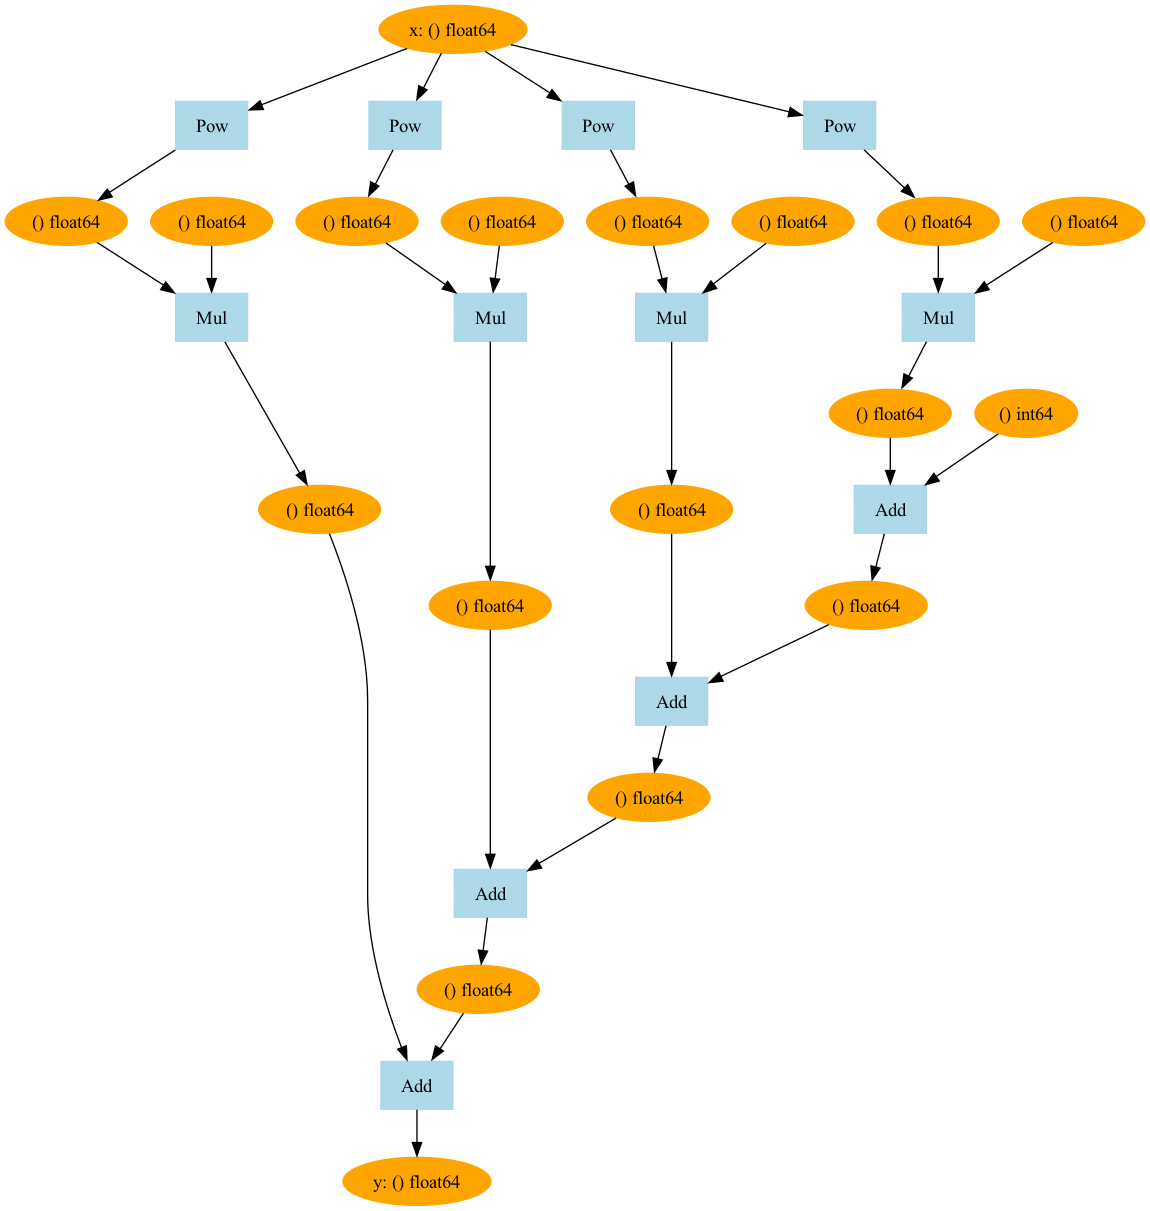

In [17]:
from dezero.utils import plot_dot_graph


x = Variable(np.array(np.pi/4))
x.name ="x"
y = my_sin(x)
y.name="y"
y.backward()

plot_dot_graph(y)


In [16]:
x = Variable(np.array(np.pi/4))
x.name ="x"
y = my_sin(x,threshold=1e-150)
y.name="y"
y.backward()

plot_dot_graph(y)